<a href="https://colab.research.google.com/github/AnuragSen370/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0342
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0026
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0020
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0021
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0017
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0014
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0020
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0016
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0016
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0015
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0014
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0017
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0013
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0012
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0013
Epoc

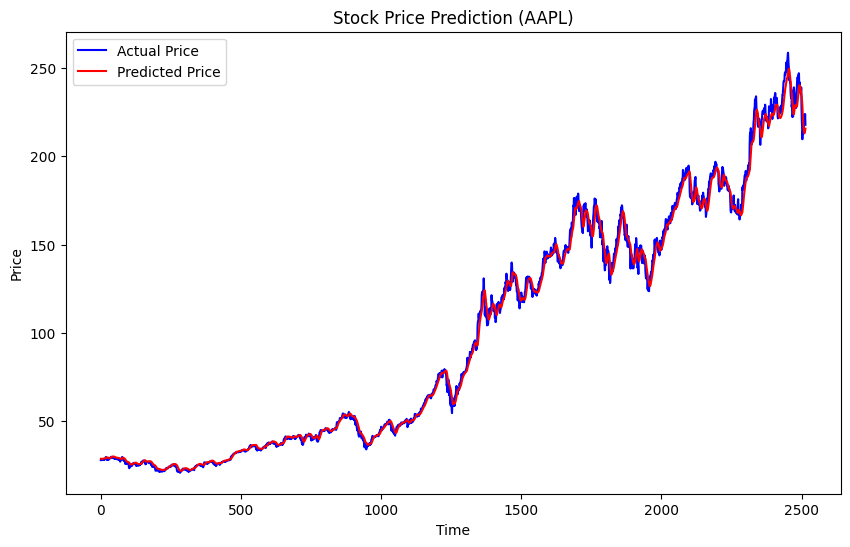

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# Load Stock Data
df = yf.download('AAPL', start='2015-01-01', end='2025-03-31')
data = df[['Close']]

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create Sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape for LSTM [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
model.fit(X, y, epochs=20, batch_size=32)

# Prediction
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Stock Price Prediction (AAPL)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
